In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "show list.csv"

shows = pd.read_csv(csv_path)
shows = shows["Title"]


In [3]:
base_url = "http://api.tvmaze.com/search/shows?q="

In [4]:

responses = []
show_info = []
show_name = []
show_id = []
tvrage = []
thetvdb = []
imdb = []



for show in shows: 
    mod_url = base_url + show
    
#     print(json.dumps(response_json, indent=4, sort_keys=True))

    
    try:
        show_data = requests.get(mod_url)
        response_json = show_data.json()
        show_name.append(response_json[0]['show']['name'])
        show_id.append(response_json[0]['show']['id'])
        tvrage.append(response_json[0]['show']['externals']['tvrage'])
        thetvdb.append(response_json[0]['show']['externals']['thetvdb'])
        imdb.append(response_json[0]['show']['externals']['imdb'])                       
        
    except:
        pass
                         
                         
                 

In [5]:
show_data_df = pd.DataFrame({"Show Name": show_name, "Show ID": show_id})
show_data_df.head()

,Show Name,Show ID
0,The Amazing Spider-Man,7623
1,The Incredible Hulk,2151
2,Spider-Man,1611
3,Blade,8331
4,Marvel's Agents of S.H.I.E.L.D.,31


In [6]:
cast_response = []
character_name = []
character_id = []
show_id_cast = []


for ids in show_id: 
    cast_url = (f"http://api.tvmaze.com/shows/{ids}?embed[]=episodes&embed[]=cast")
    
    
    try:
        cast_data = requests.get(cast_url).json()
        cast_response.append(cast_data)
        for i in range(0, 150): 
                character_name.append(cast_data['_embedded']['cast'][i]['character']['name'])
                character_id.append(cast_data['_embedded']['cast'][i]['character']['id'])
                show_id_cast.append(cast_data["id"])

    except:
        pass
                         
                   

In [7]:
character_data_df = pd.DataFrame({"Show ID": show_id_cast, "Character Name": character_name, "Character ID": character_id})
character_data_df

,Show ID,Character Name,Character ID
0,7623,Peter Parker/Spider-Man,196352
1,7623,Captain Barbera,365202
2,7623,J. Jonah Jameson,365203
3,7623,J. Jonah Jameson,365203
4,7623,Rita Conway,365204
...,...,...,...
456,33734,Ironheart,725942
457,16280,Mastermind,275625
458,16280,Dirk,275626
459,16280,Sam,275627


In [8]:
episode_id = []
episode_season = []
episode_num = []
episode_air = []
episode_name = []
show_id_ep = []


for ids in show_id: 
    cast_url = (f"http://api.tvmaze.com/shows/{ids}?embed[]=episodes&embed[]=cast")
    
    
    try:
        cast_data = requests.get(cast_url).json()
        for i in range(0, 150): 
                episode_id.append(cast_data['_embedded']['episodes'][i]['id'])
                episode_season.append(cast_data['_embedded']['episodes'][i]['season'])
                episode_num.append(cast_data['_embedded']['episodes'][i]['number'])
                episode_air.append(cast_data['_embedded']['episodes'][i]['airstamp'])
                episode_name.append(cast_data['_embedded']['episodes'][i]['name'])
                show_id_ep.append(cast_data["id"])

    except:
        pass
                         
                   

In [9]:
episode_data_df = pd.DataFrame({"Show ID": show_id_ep, "Episode Name": episode_name, "Episode ID": episode_id, "Episode Name": episode_name, "Episode Season": episode_season, "Episode Number": episode_num, "Episode Air Date": episode_air})
episode_data_df = episode_data_df.groupby(["Show ID"])
episode_data_df.head()

,Show ID,Episode Name,Episode ID,Episode Season,Episode Number,Episode Air Date
0,7623,The Amazing Spider-Man,429649,1,1,1977-09-15T00:00:00+00:00
1,7623,The Deadly Dust: Part 1,429650,1,2,1978-04-06T01:00:00+00:00
2,7623,The Deadly Dust: Part 2,429651,1,3,1978-04-13T01:00:00+00:00
3,7623,The Curse of Rava,429652,1,4,1978-04-20T01:00:00+00:00
4,7623,Night of the Clones,429653,1,5,1978-04-27T01:00:00+00:00
...,...,...,...,...,...,...
2425,16281,Recruitment,741264,1,1,2016-03-09T17:00:00+00:00
2426,16281,Sci-Tech challenge,741265,1,2,2016-03-23T16:00:00+00:00
2427,16281,Skydive Challenge,741266,1,3,2016-04-06T16:00:00+00:00
2428,16281,Inhuman Adaptation Challenge,741267,1,4,2016-04-20T16:00:00+00:00


In [10]:
episode_count_df = pd.DataFrame({"Total Episode Count": (episode_data_df["Episode ID"].count())})

In [11]:
merged_df = pd.merge(character_data_df, episode_count_df, how='inner', on="Show ID")

In [12]:
name_merge_df = pd.merge(merged_df, show_data_df, how='inner', on="Show ID")
name_merge_df = name_merge_df[["Show ID", "Show Name", "Total Episode Count", "Character ID", "Character Name"]]
name_merge_df = name_merge_df.drop_duplicates()
name_merge_df

,Show ID,Show Name,Total Episode Count,Character ID,Character Name
0,7623,The Amazing Spider-Man,14,196352,Peter Parker/Spider-Man
1,7623,The Amazing Spider-Man,14,365202,Captain Barbera
2,7623,The Amazing Spider-Man,14,365203,J. Jonah Jameson
4,7623,The Amazing Spider-Man,14,365204,Rita Conway
5,7623,The Amazing Spider-Man,14,365205,Aunt May
...,...,...,...,...,...
473,33734,Marvel Super Hero Adventures,40,725942,Ironheart
474,16280,Marvel's Agents of S.H.I.E.L.D.: Double Agent,5,275625,Mastermind
475,16280,Marvel's Agents of S.H.I.E.L.D.: Double Agent,5,275626,Dirk
476,16280,Marvel's Agents of S.H.I.E.L.D.: Double Agent,5,275627,Sam


In [13]:
# Cleaning Character Names Data
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({'James "Rhodey" Rhodes / War Machine': 'James Rhodes / War Machine', 'Peggy Carter': 'Agent Peggy Carter', "Peter Parker/Spider-Man": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Riri Williams / Ironheart": "Ironheart"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wanda Maximoff / Scarlet Witch": "Scarlet Witch",  "Wanda Frank / Scarlet Witch": "Scarlet Witch"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Sue Richards / Invisible Girl": "Invisible Woman / Invisible Girl", "Sue Storm / Invisible Woman": "Invisible Woman / Invisible Girl", "Susan Richards / Invisible Woman": "Invisible Woman / Invisible Girl"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"T'Challa/Black Panther": "T'Challa / Black Panther", "T'Challa / The Black Panther": "T'Challa / Black Panther", "Black Panther": "T'Challa / Black Panther"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Tony Stark/Ironman": "Tony Stark / Iron Man", "Iron Man": "Tony Stark / Iron Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Peter Parker": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Ant-Man": "Scott Lang / Ant-Man", "Ant Man": "Scott Lang / Ant-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Steve Rogers/Captain America": "Captain America", "Steve Rogers / Captain America": "Captain America"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Daisy Johnson": "Daisy Johnson / Quake"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wasp": "Janet van Dyne / The Wasp", "Janet van Dyne/Wasp": "Janet van Dyne / The Wasp"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Red Hulk": "Bruce Banner / Hulk", "Hulk": "Bruce Banner / Hulk", "The Hulk": "Bruce Banner / Hulk", "Bruce Banner/Hulk": "Bruce Banner / Hulk", "David Banner": "Bruce Banner / Hulk"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"The Beast": "Dr. Hank McCoy / Beast", "Beast": "Dr. Hank McCoy / Beast"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Thor Odinson": "Thor"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Storm": "Ororo Munroe / Storm", "Ororo Monroe/Storm": "Ororo Munroe / Storm"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Invisible Woman": "Invisible Woman / Invisible Girl"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Hope van Dyne / The Wasp": "Janet van Dyne/Wasp"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Hawkeye": "Clint Barton / Hawkeye"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Gwen Stacy": "Gwen Stacy / Ghost Spider", "Ghost-Spider": "Gwen Stacy / Ghost Spider"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Shadowcat": "Kitty Pryde / Shadowcat"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Miles Morales / Spider-Man": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"The Thing": "Benjamin J. Grimm / The Thing", "Ben Grimm / The Thing": "Benjamin J. Grimm / The Thing"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Danny Rand / Iron Fist": "Daniel Rand / Iron Fist"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Phil Coulson": "Agent Phil Coulson"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Rocket": "Rocket Raccoon"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Melinda May": "Agent Melinda May"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Kamala Khan / Ms. Marvel": "Captain Marvel", "Ms. Marvel": "Captain Marvel", "Carol Danvers / Ms. Marvel": "Captain Marvel", "Carol Danvers / Captain Marvel": "Captain Marvel"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Jemma Simmons": "Agent Jemma Simmons"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Norrin Radd / Silver Surfer", "Silver Surfer / Dark Surfer"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Falcon": "Sam Wilson / Falcon"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Nightcrawler": "Kurt Wagner / Nightcrawler"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wolverine": "Logan / Wolverine"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Julia Carpenter / Spider Woman": "Spider-Woman", "Jessica Drew / Spider-Woman": "Spider-Woman"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Jonah": "J. Jonah Jameson"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Mister Fantastic": "Prof. Reed Richards / Mister Fantastic"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Leo Fitz": "Agent Leo Fitz"})

In [14]:
character_appearances = name_merge_df.groupby(["Character Name"])[["Show ID"]].count()
character_appearances["Sum of Episodes"] = name_merge_df.groupby(["Character Name"])[["Total Episode Count"]].sum()
character_appearances = character_appearances.sort_values(by='Show ID', ascending=False)
character_appearances.head(10)

,Show ID,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Thor,6,313
Sam Wilson / Falcon,5,232
Janet van Dyne / The Wasp,5,270
Logan / Wolverine,5,258
Ororo Munroe / Storm,4,166


In [15]:
character_appearances = character_appearances.rename(columns={"Show ID":"Count of Shows"})
character_appearances.head(10)

,Count of Shows,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Thor,6,313
Sam Wilson / Falcon,5,232
Janet van Dyne / The Wasp,5,270
Logan / Wolverine,5,258
Ororo Munroe / Storm,4,166


In [16]:
character_appearances["Count of Shows"].describe()

count    288.000000
mean       1.427083
std        1.181254
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       11.000000
Name: Count of Shows, dtype: float64

In [17]:
num_ep_appearances = character_appearances.sort_values(by='Sum of Episodes', ascending=False)
num_ep_appearances.head(10)

,Count of Shows,Sum of Episodes
Character Name,,
Bruce Banner / Hulk,9,911
Peter Parker / Spider-Man,11,643
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Thor,6,313
Janet van Dyne / The Wasp,5,270
Logan / Wolverine,5,258
Captain America,4,257
Jack McGee,1,249


In [18]:
num_ep_appearances["Sum of Episodes"].describe()

count    288.000000
mean      57.270833
std       86.113993
min        1.000000
25%       16.000000
50%       32.000000
75%       67.000000
max      911.000000
Name: Sum of Episodes, dtype: float64

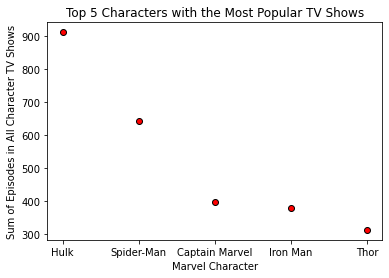

In [19]:
episodes_sca = ["Hulk", "Spider-Man", "Captain Marvel", "Iron Man","Thor"]
sum_ep_info = [911, 643, 396, 378, 313]
plt.title("Top 5 Characters with the Most Popular TV Shows")
plt.xlabel("Marvel Character")
plt.ylabel("Sum of Episodes in All Character TV Shows")
plt.scatter(episodes_sca, sum_ep_info, marker="o", facecolors="red", edgecolors="black")

In [49]:
ten_tv = character_appearances.head(10)
ten_tv

,Count of Shows,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Thor,6,313
Sam Wilson / Falcon,5,232
Janet van Dyne / The Wasp,5,270
Logan / Wolverine,5,258
Ororo Munroe / Storm,4,166


In [56]:
ten_tv[['Count of Shows']].describe()

,Count of Shows
count,10.000000
mean,6.300000
std,2.263233
min,4.000000
25%,5.000000
50%,5.500000
75%,7.000000
max,11.000000


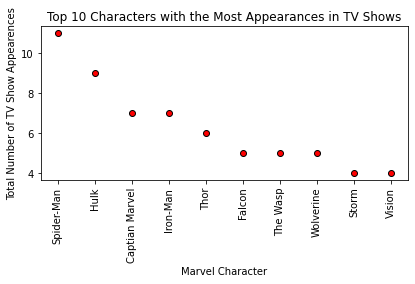

In [47]:
episodes_sca = ["Spider-Man", "Hulk", "Captian Marvel", "Iron-Man", "Thor", "Falcon", "The Wasp", "Wolverine", "Storm", "Vision"]
sum_ep_info = [11, 9, 7, 7, 6, 5, 5, 5, 4, 4]
plt.title("Top 10 Characters with the Most Appearances in TV Shows")
plt.xlabel("Marvel Character")
plt.ylabel("Total Number of TV Show Appearences")
plt.xticks(rotation = 90)
plt.scatter(episodes_sca, sum_ep_info, marker="o", facecolors="red", edgecolors="black")
plt.tight_layout()
plt.savefig('TVplot') 

In [27]:
name_merge_df.to_csv("TV_DF.csv", index = False)

In [32]:
movie_csv_path = "MoviesDF.csv"
movies = pd.read_csv(movie_csv_path)

In [33]:
movies.head(10)

,Row Labels,Count of Movies
0,Captain America,10
1,Natasha Romanoff Black Widow,8
2,Nick Fury,7
3,"Bruce Banner ""Hulk""",7
4,Maria Hill,7
5,"Tony Stark ""ironMan""",6
6,Thanos,6
7,"Sam Wilson ""Falcon""",6
8,"james ""Rhodey"" Rhodes War Machine",6
9,Thor,6


In [48]:
ten_movies = movies.head(10)
ten_movies.describe()

,Count of Movies
count,10.000000
mean,6.900000
std,1.286684
min,6.000000
25%,6.000000
50%,6.500000
75%,7.000000
max,10.000000


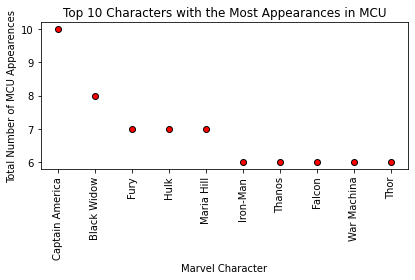

In [46]:
movie_sca = ["Captain America", "Black Widow", "Fury", "Hulk", "Maria Hill", "Iron-Man", "Thanos", "Falcon", "War Machina", "Thor"]
sum_mcu_info = [10, 8, 7, 7, 7, 6, 6, 6, 6, 6]
plt.title("Top 10 Characters with the Most Appearances in MCU")
plt.xlabel("Marvel Character")
plt.ylabel("Total Number of MCU Appearences")
plt.xticks(rotation = 90)
plt.scatter(movie_sca, sum_mcu_info, marker="o", facecolors="red", edgecolors="black")
plt.tight_layout()
plt.savefig('Movieplot') 